In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import re
import urllib.request
import tarfile
import os

In [5]:
# Step 1: Data Collection
# Download the IMDb dataset from the URL and extract it
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
urllib.request.urlretrieve(url, 'aclImdb_v1.tar.gz')

('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x250a0ba37f0>)

In [6]:
# Extract the downloaded tar file
with tarfile.open('aclImdb_v1.tar.gz', 'r:gz') as tar:
    tar.extractall(path='aclImdb')

In [14]:
def load_imdb_data(directory):
    data = []
    for label in ['pos', 'neg']:
        labeled_dir = os.path.join(directory, label)
        print(f"Loading from: {labeled_dir}")  # Debugging line
        try:
            for filename in os.listdir(labeled_dir):
                if filename.endswith('.txt'):
                    with open(os.path.join(labeled_dir, filename), 'r', encoding='utf-8') as file:
                        review = file.read()
                        data.append((review, label))
        except FileNotFoundError as e:
            print(e)  # Print the error to understand what's wrong
    return pd.DataFrame(data, columns=['review', 'sentiment'])

# Load training data
train_data = load_imdb_data('aclImdb/train')


Loading from: aclImdb/train\pos
Loading from: aclImdb/train\neg


In [15]:
# Step 2: Data Preprocessing
# Function to clean and preprocess the review text
def preprocess_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'\W', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the preprocessing function to the review data
train_data['cleaned_review'] = train_data['review'].apply(preprocess_text)


In [16]:
# Step 3: Vocabulary Creation
# Use CountVectorizer to create a Bag of Words model for the reviews
# This converts the text into a matrix of token counts
vectorizer = CountVectorizer(max_features=5000)  # Limiting to the top 5000 words
X = vectorizer.fit_transform(train_data['cleaned_review']).toarray()


In [17]:
# Step 4: Feature Extraction and Encoding
# Encode sentiment labels into binary values: 1 for positive and 0 for negative
y = LabelEncoder().fit_transform(train_data['sentiment'])  # 'pos' -> 1, 'neg' -> 0


In [18]:
# Step 5: Train Test Split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
# Step 6: Train Logistic Regression Model
# Initialize and train a Logistic Regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\Rahul Paradkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Step 7: Model Evaluation
# Predict the sentiments on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using accuracy, precision, recall, and F1-score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.8702
Precision: 0.8625834314880251
Recall: 0.8802083333333334
F1-Score: 0.8713067618481063


In [22]:
# Step 8: Custom Prediction Function
# Function to predict the sentiment of a custom review
def predict_sentiment(review):
    # Preprocess the review
    review = preprocess_text(review)
    # Convert the review to a vector using the trained vectorizer
    review_vector = vectorizer.transform([review]).toarray()
    # Predict the sentiment using the trained model
    prediction = model.predict(review_vector)
    return 'Positive' if prediction == 1 else 'Negative'

# Example: Test custom review
print(predict_sentiment("The movie was fantastic!"))

# You can replace the above review with any custom input to test the prediction function.


Positive


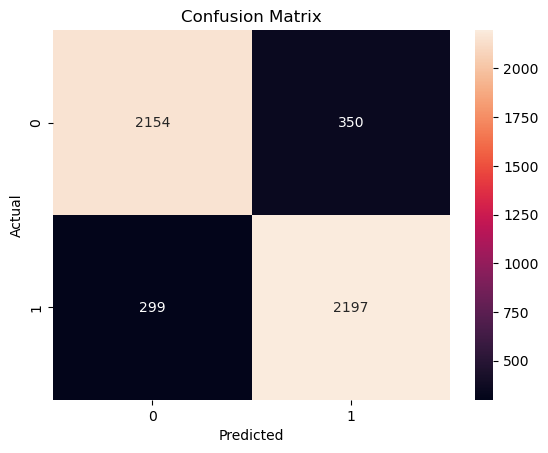

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
